# Act I.

# Part 1: Preprocessing

### Objectives:
* Compile data
* Handle missing data and outliers
*  What is feature engineering step???
* Data normalization and scaling

In [5]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import kagglehub


c:\Users\epice\OneDrive\Documents\Data Mining HW\data-mining\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Raw data 
# Download latest version
path = kagglehub.dataset_download("jacksoncrow/stock-market-dataset")

print("Path to dataset files:", path)



100%|██████████| 522M/522M [00:28<00:00, 19.2MB/s] 

Extracting files...


Path to dataset files: C:\Users\epice\.cache\kagglehub\datasets\jacksoncrow\stock-market-dataset\versions\2


In [6]:
dataset = pd.read_csv('C:/Users/epice/.cache/kagglehub/datasets/jacksoncrow/stock-market-dataset/versions/2/stocks/AAPL.csv')
df = pd.DataFrame(dataset)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500


In [8]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

print(X)

[['1980-12-12' 0.5133928656578064 0.515625 0.5133928656578064
  0.5133928656578064 0.4067815542221069]
 ['1980-12-15' 0.4888392984867096 0.4888392984867096 0.4866071343421936
  0.4866071343421936 0.385558158159256]
 ['1980-12-16' 0.453125 0.453125 0.4508928656578064 0.4508928656578064
  0.3572602868080139]
 ...
 ['2020-03-30' 250.7400054931641 255.5200042724609 249.3999938964844
  254.80999755859372 254.80999755859372]
 ['2020-03-31' 255.6000061035156 262.489990234375 252.0 254.2899932861328
  254.2899932861328]
 ['2020-04-01' 246.5 248.72000122070312 239.1300048828125
  240.91000366210935 240.91000366210935]]


In [9]:
print(y)

[117258400  43971200  26432000 ...  41994100  49250500  43956200]


In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming df['date'] is your date column
df['Date'] = pd.to_datetime(df['Date'])
df['day_of_week'] = df['Date'].dt.dayofweek # Extract day of week (0=Monday, 6=Sunday)
df['month'] = df['Date'].dt.month          # Extract month (1-12)
df['quarter'] = df['Date'].dt.quarter       # Extract quarter (1-4)

# Ordinal encode 'month' and 'quarter' as ordered features
ordinal_encoder = OrdinalEncoder()
df[['month', 'quarter']] = ordinal_encoder.fit_transform(df[['month', 'quarter']])


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train)

[['2016-05-23' 95.87000274658205 97.19000244140624 95.66999816894533
  96.43000030517578 90.9359359741211]
 ['2009-06-12' 19.82999992370605 19.87142944335937 19.43428611755371
  19.567142486572266 16.985074996948242]
 ['2008-04-21' 23.1728572845459 24.071428298950195 23.108572006225582
  24.022857666015625 20.852819442749023]
 ...
 ['1984-07-13' 0.4754464328289032 0.484375 0.4642857015132904
  0.4709821343421936 0.3731777667999267]
 ['2001-07-02' 1.6885714530944824 1.7307143211364746 1.6528571844100952
  1.7071428298950195 1.4818695783615112]
 ['1981-11-18' 0.3370535671710968 0.3392857015132904 0.3370535671710968
  0.3370535671710968 0.2670608460903168]]


## Part 2: Implementing Traditional ML Models

In [22]:
print("Dataframe Shape:" , df.shape)

df.isnull().sum()
# no missing values

# The date can be a categorical variable depending on the context.
# Seasonal Trends, Day of the Week Effects, Holiday and Event patterns

Dataframe Shape: (9909, 11)


Date           0
Open           0
High           0
Low            0
Close          0
Adj Close      0
Volume         0
date           0
month          0
quarter        0
day_of_week    0
dtype: int64

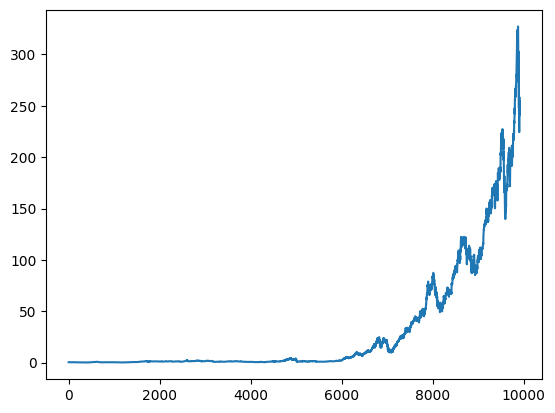

In [26]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

# Target
output_var = pd.DataFrame(df['Adj Close'])
# Features
features = ['Open', 'High', 'Low', 'Volume']

In [27]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head() 

,Open,High,Low,Volume
0,0.000970,0.000967,0.000981,0.063023
1,0.000894,0.000886,0.000898,0.023516
2,0.000784,0.000777,0.000787,0.014061
3,0.000812,0.000811,0.000822,0.011462
4,0.000853,0.000852,0.000863,0.009711


In [28]:
from sklearn.model_selection import TimeSeriesSplit
timesplit = TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [29]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
# https://www.analyticsvidhya.com/blog/2021/10/machine-learning-for-stock-market-prediction-with-step-by-step-implementation/

#Building the LSTM Model
print(keras.__version__)
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

ModuleNotFoundError: No module named 'tensorflow'

## Part 3: Visualization of Feature Importance

# Act II.

## Part 1

In [ ]:
# Imports

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def ReLU(x):
    return max(0,x)

# Define inputs
training_inputs = 0
# Define outputs
training_outputs = 0


weights = 0

input_layer = training_inputs
outputs = sigmoid(np.dot(training_inputs, weights))
# outputs = ReLU(np.dot(training_inputs, weights))


